In [1]:
#Program that uses artifical recurrent neural network, LSTM to predict stock closing prices 

In [2]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Grab stock quote
sq = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
sq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607437
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426826
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596115
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


In [4]:
sq.shape

(2003, 6)

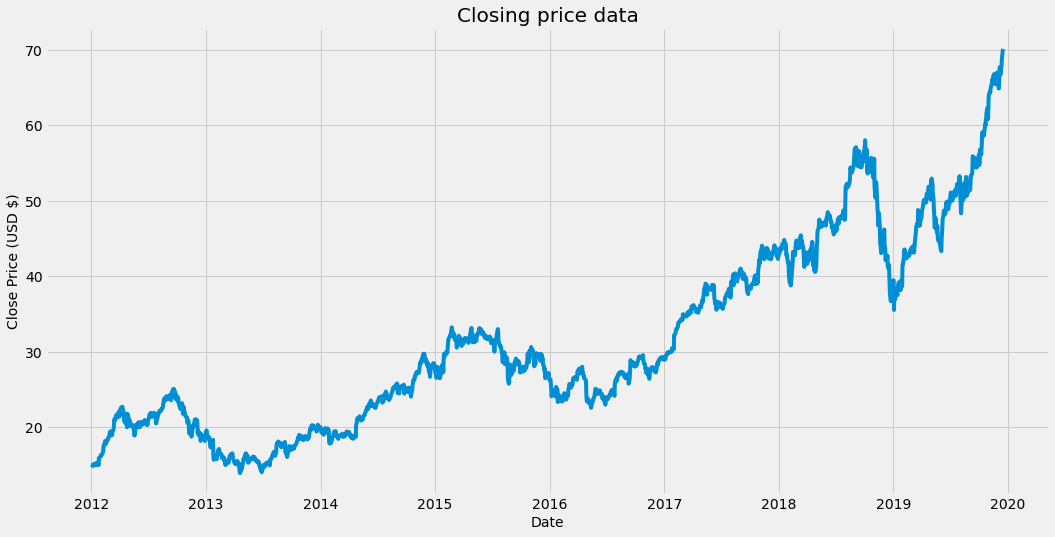

In [5]:
#Closing price data visual
plt.figure(figsize=(16,8))
plt.title('Closing price data')
plt.plot(sq['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD $)', fontsize=14)
plt.show()

In [6]:
#Create dataframe for close column
data = sq.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get num rows to train model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1603

In [7]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_traina nd y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [9]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.01316509, 0.01457063, 0.01748985, ..., 0.13766105, 0.14243103,
        0.14442805],
       [0.01457063, 0.01748985, 0.02026915, ..., 0.14243103, 0.14442805,
        0.13949272],
       [0.01748985, 0.02026915, 0.01984303, ..., 0.14442805, 0.13949272,
        0.13293563],
       ...,
       [0.52177011, 0.51927696, 0.51669488, ..., 0.5857448 , 0.59767603,
        0.5912207 ],
       [0.51927696, 0.51669488, 0.51322235, ..., 0.59767603, 0.5912207 ,
        0.58926183],
       [0.51669488, 0.51322235, 0.51958863, ..., 0.5912207 , 0.58926183,
        0.58164901]])

In [10]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [11]:
#Building Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 90s 54ms/step - loss: 8.2092e-04


In [14]:
#Create the testing data set
#Scaled values from 1543-2003
test_data = scaled_data[training_data_len -60: 2003, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [15]:
#Convert to numpy/reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get models predicted price vals
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 17ms/step


In [19]:
#Get RSME
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.9849321707490815

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


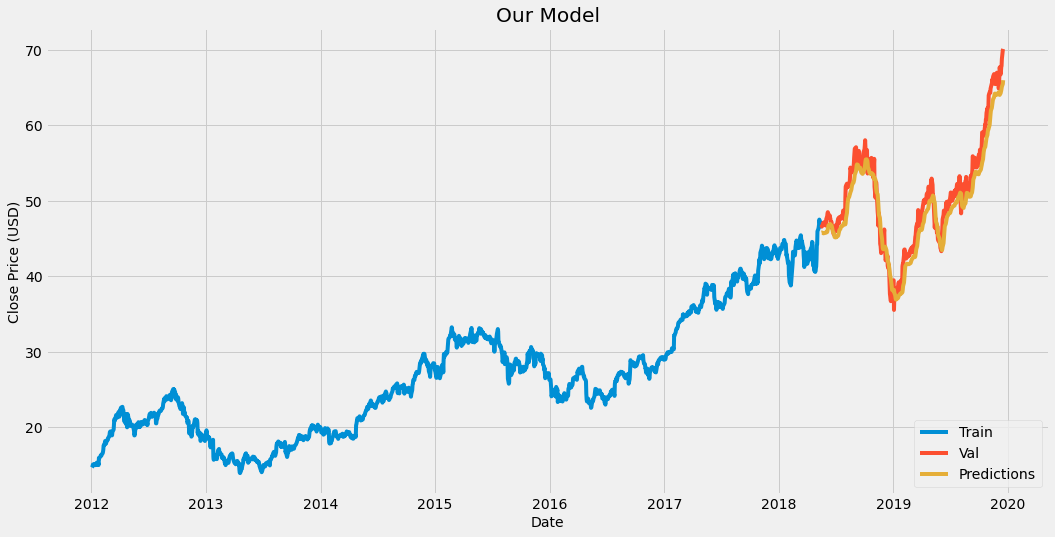

In [21]:
#Plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Data visual
plt.figure(figsize=(16,8))
plt.title('Our Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [22]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.787029
2018-05-18,46.577499,45.797585
2018-05-21,46.907501,45.747906
2018-05-22,46.790001,45.718182
2018-05-23,47.090000,45.686718
...,...,...
2019-12-11,67.692497,64.611282
2019-12-12,67.864998,64.857681
2019-12-13,68.787498,65.115700


In [24]:
#Quote/DF
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#Scale data (0-1)
last_60_days_scaled = scaler.transform(last_60_days)

#List of scaled data + reshape
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Undo scaling
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 29ms/step
[[66.47748]]


In [26]:
#Quote on specific day
apple_quote_day = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote_day['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
